<a href="https://colab.research.google.com/github/ClauRozasG/Modelo-predictivo-enfermedades-cardiacas/blob/main/Enfermedades_cardiacas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
#Importamos las librerías que se utilizarán
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve



# **Lectura del dataset**

In [45]:
#leemos el dataset
df_heart=pd.read_csv("heart.csv")
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disea
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [46]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  disea     1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [47]:
#Eliminaremos los duplicados puesto que no nos aportaría más información de lo que ya se tiene.
df_heart=df_heart.drop_duplicates()
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  disea     302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [48]:
df_heart.mean()

age          54.420530
sex           0.682119
cp            0.963576
trestbps    131.602649
chol        246.500000
fbs           0.149007
restecg       0.526490
thalach     149.569536
exang         0.327815
oldpeak       1.043046
slope         1.397351
ca            0.718543
thal          2.314570
disea         0.543046
dtype: float64

# **Análisis EDA**

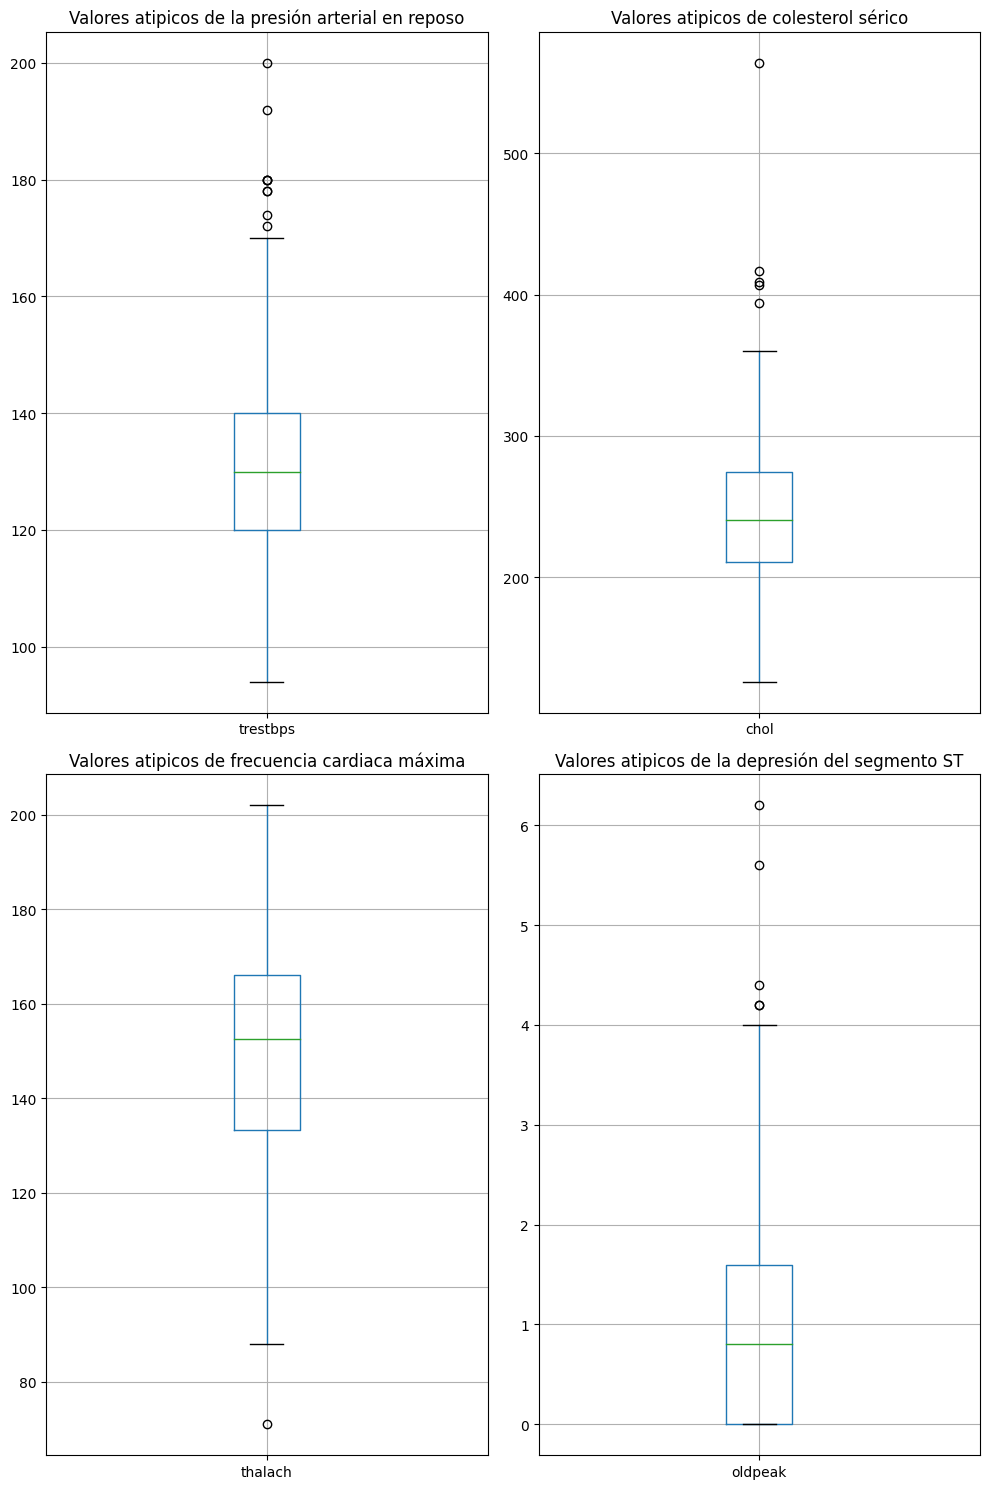

In [49]:
#Creo una función para que me dé los gráficos de los valores atipicos
#Escogeré las 4 columnas con valores continuos
def ver_valores_atipicos(dataframe):
  fig, axes= plt.subplots(nrows=2, ncols=2, figsize=(10,15))

  #Primer subgráfico
  dataframe.boxplot(['trestbps'], ax=axes[0,0])
  axes[0,0].set_title("Valores atipicos de la presión arterial en reposo")

  #Segundo subgráfico
  dataframe.boxplot(['chol'], ax=axes[0,1])
  axes[0,1].set_title("Valores atipicos de colesterol sérico")

  #Tercer subgráfico
  dataframe.boxplot(['thalach'], ax=axes[1,0])
  axes[1,0].set_title("Valores atipicos de frecuencia cardiaca máxima")

  #Cuarto subgráfico
  dataframe.boxplot(['oldpeak'], ax=axes[1,1])
  axes[1,1].set_title("Valores atipicos de la depresión del segmento ST")

  plt.tight_layout()
  plt.show()


ver_valores_atipicos(df_heart)

In [50]:
model = IsolationForest(contamination=0.02)
predictions = model.fit_predict(df_heart[['trestbps']])
outliers = df_heart[predictions == -1]
outliers

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disea
29,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
151,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
173,39,0,2,94,199,0,1,179,0,0.0,2,0,2,1
175,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
301,51,1,2,94,227,0,1,154,1,0.0,2,1,3,1
396,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0


Q1->120.0, Q2->20.0, Q3->140.0, LS->90.0, LI->170.0


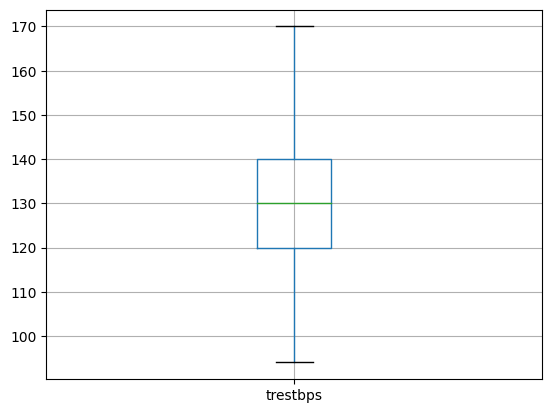

In [51]:
valor=df_heart['trestbps']
Q1=valor.quantile(.25)
Q3=valor.quantile(.75)
Q2=Q3-Q1
limite_inferior=Q1-1.5*Q2
limite_superior=Q3+1.5*Q2
seleccion=((valor >= limite_inferior) & (valor<=limite_superior))
dfheart_new=df_heart[seleccion]
dfheart_new.boxplot(['trestbps'])
print(f'Q1->{Q1}, Q2->{Q2}, Q3->{Q3}, LS->{limite_inferior}, LI->{limite_superior}')

Q1->211.0, Q2->63.0, Q3->274.0, LS->116.5, LI->368.5


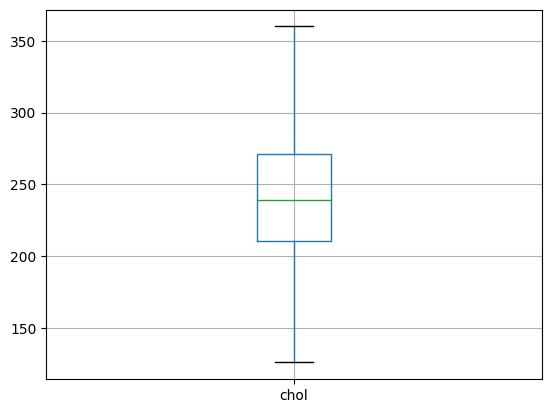

In [52]:
valor=dfheart_new['chol']
Q1=valor.quantile(.25)
Q3=valor.quantile(.75)
Q2=Q3-Q1
limite_inferior=Q1-1.5*Q2
limite_superior=Q3+1.5*Q2
seleccion=((valor >= limite_inferior) & (valor<=limite_superior))
dfheart_new=dfheart_new[seleccion]
dfheart_new.boxplot(['chol'])
print(f'Q1->{Q1}, Q2->{Q2}, Q3->{Q3}, LS->{limite_inferior}, LI->{limite_superior}')

Q1->132.0, Q2->35.25, Q3->167.25, LS->79.125, LI->220.125


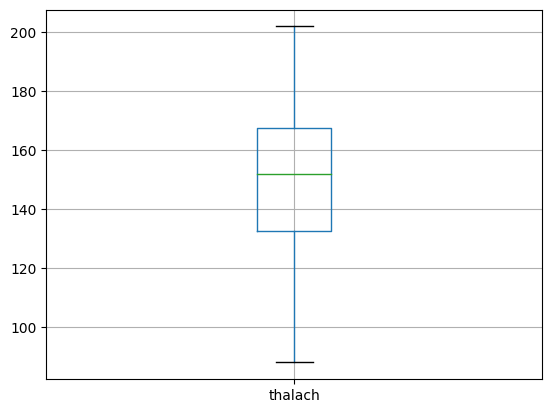

In [53]:
valor=dfheart_new['thalach']
Q1=valor.quantile(.25)
Q3=valor.quantile(.75)
Q2=Q3-Q1
limite_inferior=Q1-1.5*Q2
limite_superior=Q3+1.5*Q2
seleccion=((valor >= limite_inferior) & (valor<=limite_superior))
dfheart_new=dfheart_new[seleccion]
dfheart_new.boxplot(['thalach'])
print(f'Q1->{Q1}, Q2->{Q2}, Q3->{Q3}, LS->{limite_inferior}, LI->{limite_superior}')

Q1->0.0, Q2->1.6, Q3->1.6, LS->-2.4000000000000004, LI->4.0


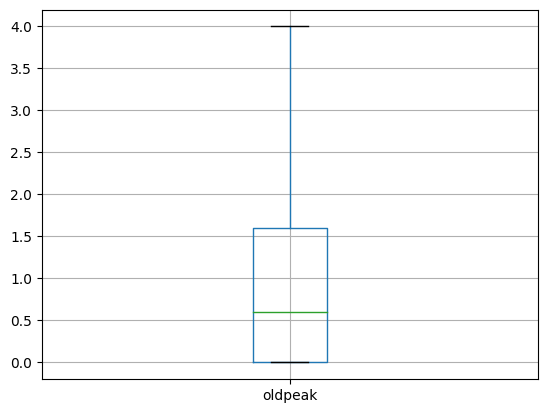

In [54]:
valor=dfheart_new['oldpeak']
Q1=valor.quantile(.25)
Q3=valor.quantile(.75)
Q2=Q3-Q1
limite_inferior=Q1-1.5*Q2
limite_superior=Q3+1.5*Q2
seleccion=((valor >= limite_inferior) & (valor<=limite_superior))
dfheart_new=dfheart_new[seleccion]
dfheart_new.boxplot(['oldpeak'])
print(f'Q1->{Q1}, Q2->{Q2}, Q3->{Q3}, LS->{limite_inferior}, LI->{limite_superior}')

In [55]:
dfheart_new

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disea
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


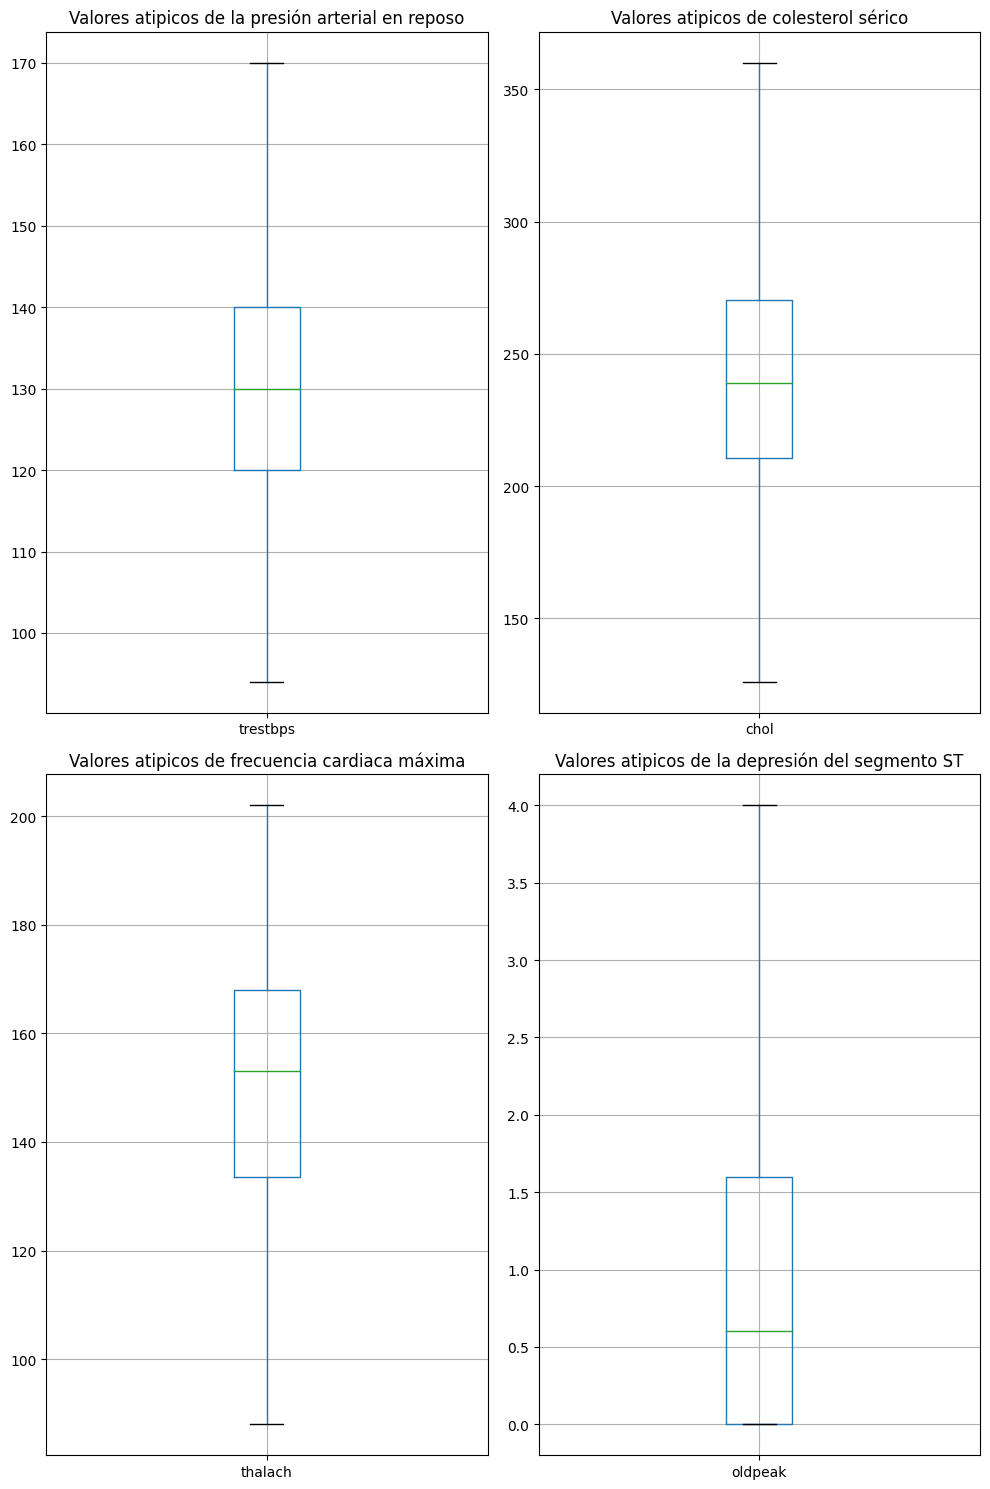

In [56]:
ver_valores_atipicos(dfheart_new)

In [57]:
print("Información")
dfheart_new.info()
print("Medias")
dfheart_new.mean()

Información
<class 'pandas.core.frame.DataFrame'>
Int64Index: 283 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       283 non-null    int64  
 1   sex       283 non-null    int64  
 2   cp        283 non-null    int64  
 3   trestbps  283 non-null    int64  
 4   chol      283 non-null    int64  
 5   fbs       283 non-null    int64  
 6   restecg   283 non-null    int64  
 7   thalach   283 non-null    int64  
 8   exang     283 non-null    int64  
 9   oldpeak   283 non-null    float64
 10  slope     283 non-null    int64  
 11  ca        283 non-null    int64  
 12  thal      283 non-null    int64  
 13  disea     283 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB
Medias


age          54.049470
sex           0.699647
cp            0.985866
trestbps    129.883392
chol        242.314488
fbs           0.141343
restecg       0.522968
thalach     149.961131
exang         0.318021
oldpeak       0.951943
slope         1.427562
ca            0.696113
thal          2.296820
disea         0.558304
dtype: float64

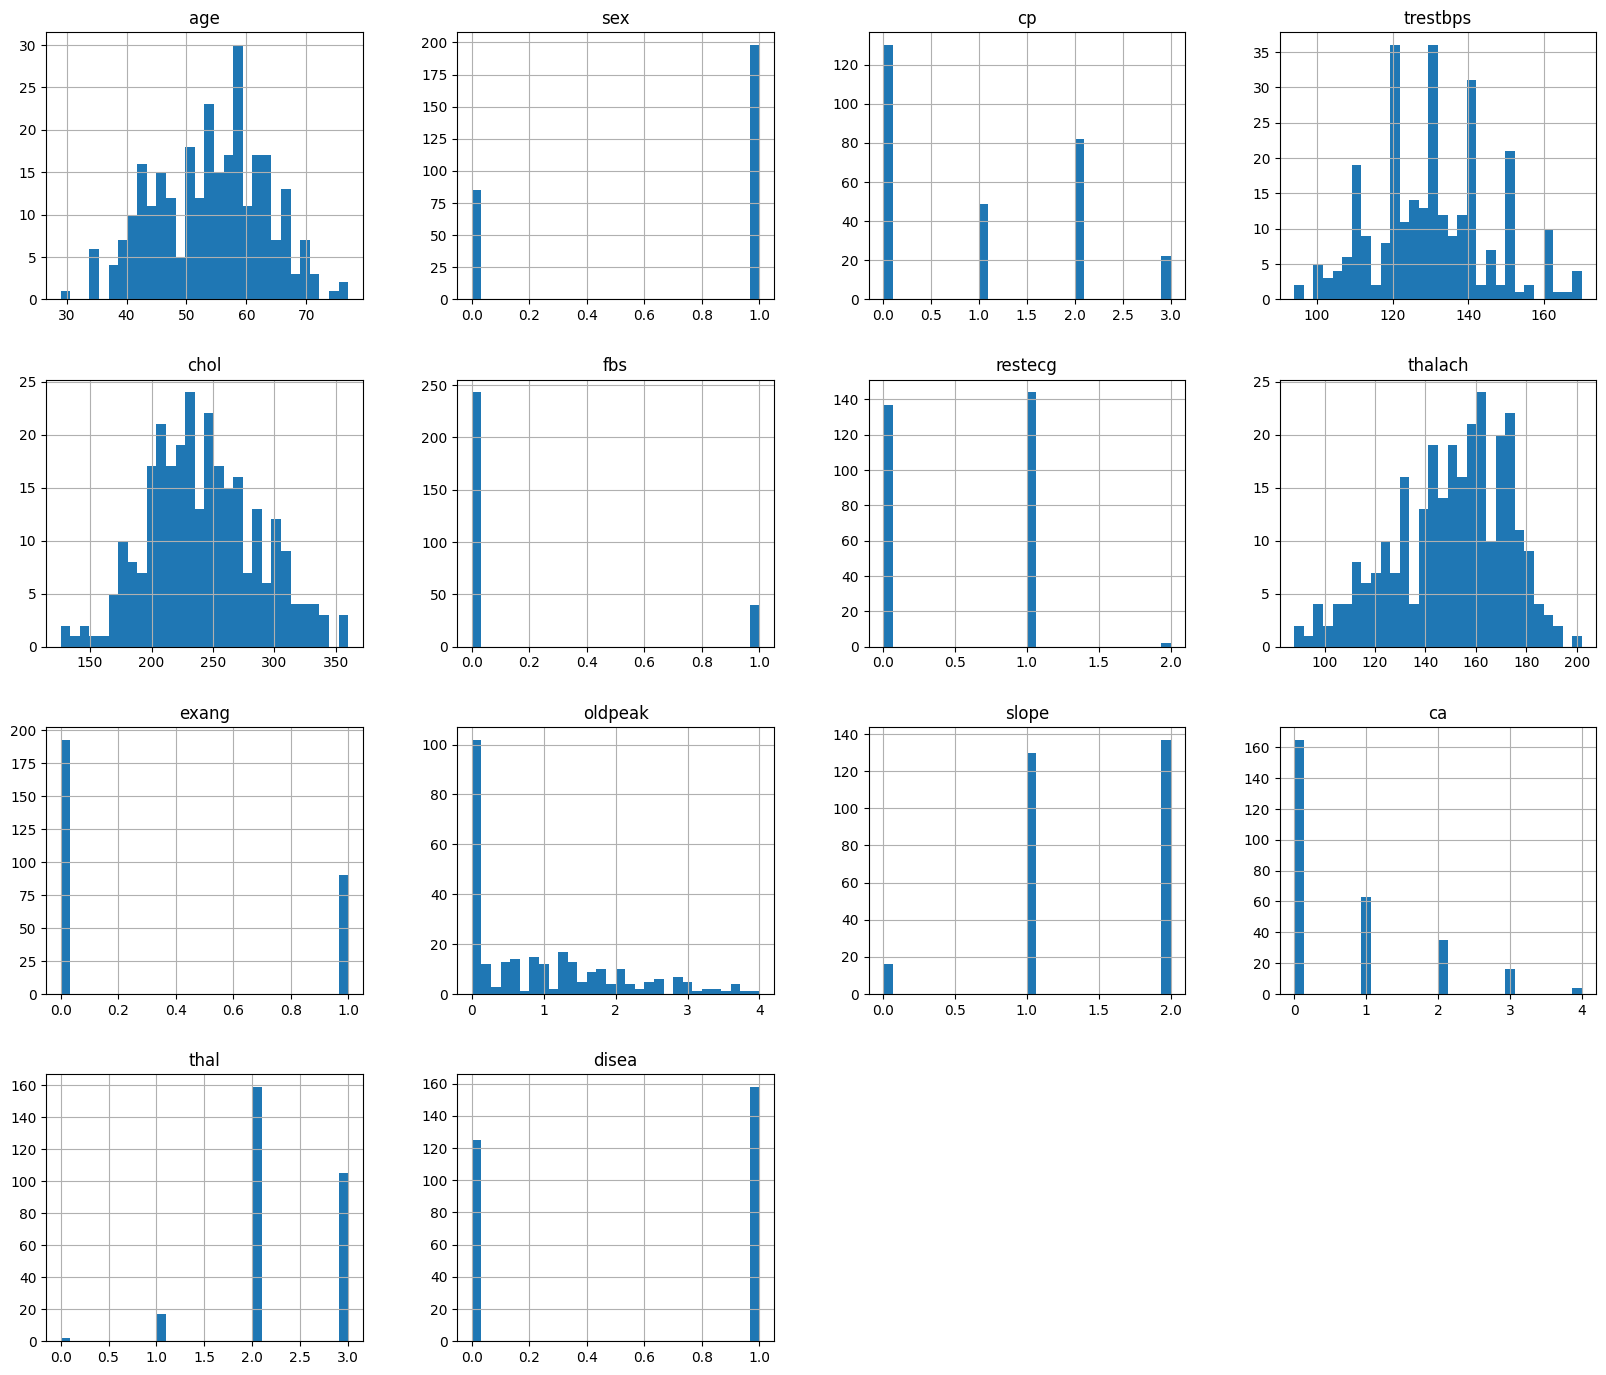

In [58]:
#Ahora graficaremos histogramas para ver los valores y homogenizarlos
dfheart_new.hist(bins=30, figsize=(20,17));

In [59]:
"""
Crearé un nuevo dataframe en donde se les pondrá valor a los rangos de las columnas continuas para que se pueda observar mejor como están distribuidos
"""
df_copy=dfheart_new.copy()
def redifinicion_valores():
  df_copy['rango_edad']=pd.cut(x=dfheart_new['age'], bins=[28,40,50,60,70,80], labels=[1,2,3,4,5])
  df_copy['rango_trestbps']=pd.cut(x=dfheart_new['trestbps'], bins=[90,110,130,150,170], labels=[1,2,3,4])
  df_copy['rango_chol']=pd.cut(x=dfheart_new['chol'], bins=[100,150,200,250,300,350,400], labels=[1,2,3,4,5,6])
  df_copy['rango_thalach']=pd.cut(x=dfheart_new['thalach'], bins=[0,100,120,140,160,180,200, 220], labels=[1,2,3,4,5,6,7])
  df_copy['rango_oldpeak']=pd.cut(x=dfheart_new['oldpeak'], bins=[-0.1,1.0,2.0,3.0,4.0,5.0], labels=[1,2,3,4,5])

  return df_copy

redifinicion_valores()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disea,rango_edad,rango_trestbps,rango_chol,rango_thalach,rango_oldpeak
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,3,2,3,5,1
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,3,3,3,4,4
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,4,3,2,3,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,4,3,3,5,1
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,4,3,4,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,4,2,3,2,2
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,2,1,1,5,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,3,2,4,5,1
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,3,4,4,3,1


In [60]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283 entries, 0 to 878
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             283 non-null    int64   
 1   sex             283 non-null    int64   
 2   cp              283 non-null    int64   
 3   trestbps        283 non-null    int64   
 4   chol            283 non-null    int64   
 5   fbs             283 non-null    int64   
 6   restecg         283 non-null    int64   
 7   thalach         283 non-null    int64   
 8   exang           283 non-null    int64   
 9   oldpeak         283 non-null    float64 
 10  slope           283 non-null    int64   
 11  ca              283 non-null    int64   
 12  thal            283 non-null    int64   
 13  disea           283 non-null    int64   
 14  rango_edad      283 non-null    category
 15  rango_trestbps  283 non-null    category
 16  rango_chol      283 non-null    category
 17  rango_thalach   

In [61]:

# Obtenemos representación numérica con cat.codes en las columnas tipo categóricas para que se puedan ver en mi matriz de correlación
df_copy['rango_edad'] = df_copy['rango_edad'].cat.codes
df_copy['rango_trestbps'] = df_copy['rango_trestbps'].cat.codes
df_copy['rango_chol'] = df_copy['rango_chol'].cat.codes
df_copy['rango_thalach'] = df_copy['rango_thalach'].cat.codes
df_copy['rango_oldpeak'] = df_copy['rango_oldpeak'].cat.codes
df_copy


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disea,rango_edad,rango_trestbps,rango_chol,rango_thalach,rango_oldpeak
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,2,1,2,4,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,2,2,2,3,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,3,2,1,2,2
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,3,2,2,4,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,3,2,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,3,1,2,1,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,1,0,0,4,0
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,2,1,3,4,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,2,3,3,2,0


In [62]:

#elimino las filas que fueron re categorizadas
df_copy.drop(['trestbps', 'chol', 'thalach', 'oldpeak','age'], axis=1, inplace=True)
df_copy


,sex,cp,fbs,restecg,exang,slope,ca,thal,disea,rango_edad,rango_trestbps,rango_chol,rango_thalach,rango_oldpeak
0,1,0,0,1,0,2,2,3,0,2,1,2,4,0
1,1,0,1,0,1,0,0,3,0,2,2,2,3,3
2,1,0,0,1,1,0,0,3,0,3,2,1,2,2
3,1,0,0,1,0,2,1,3,0,3,2,2,4,0
4,0,0,1,1,0,1,3,2,0,3,2,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,0,2,0,0,0,1,0,2,1,3,1,2,1,1
733,0,2,0,1,0,1,0,2,1,1,0,0,4,0
739,1,0,0,1,1,2,1,3,0,2,1,3,4,0
843,1,3,0,0,0,2,0,2,0,2,3,3,2,0


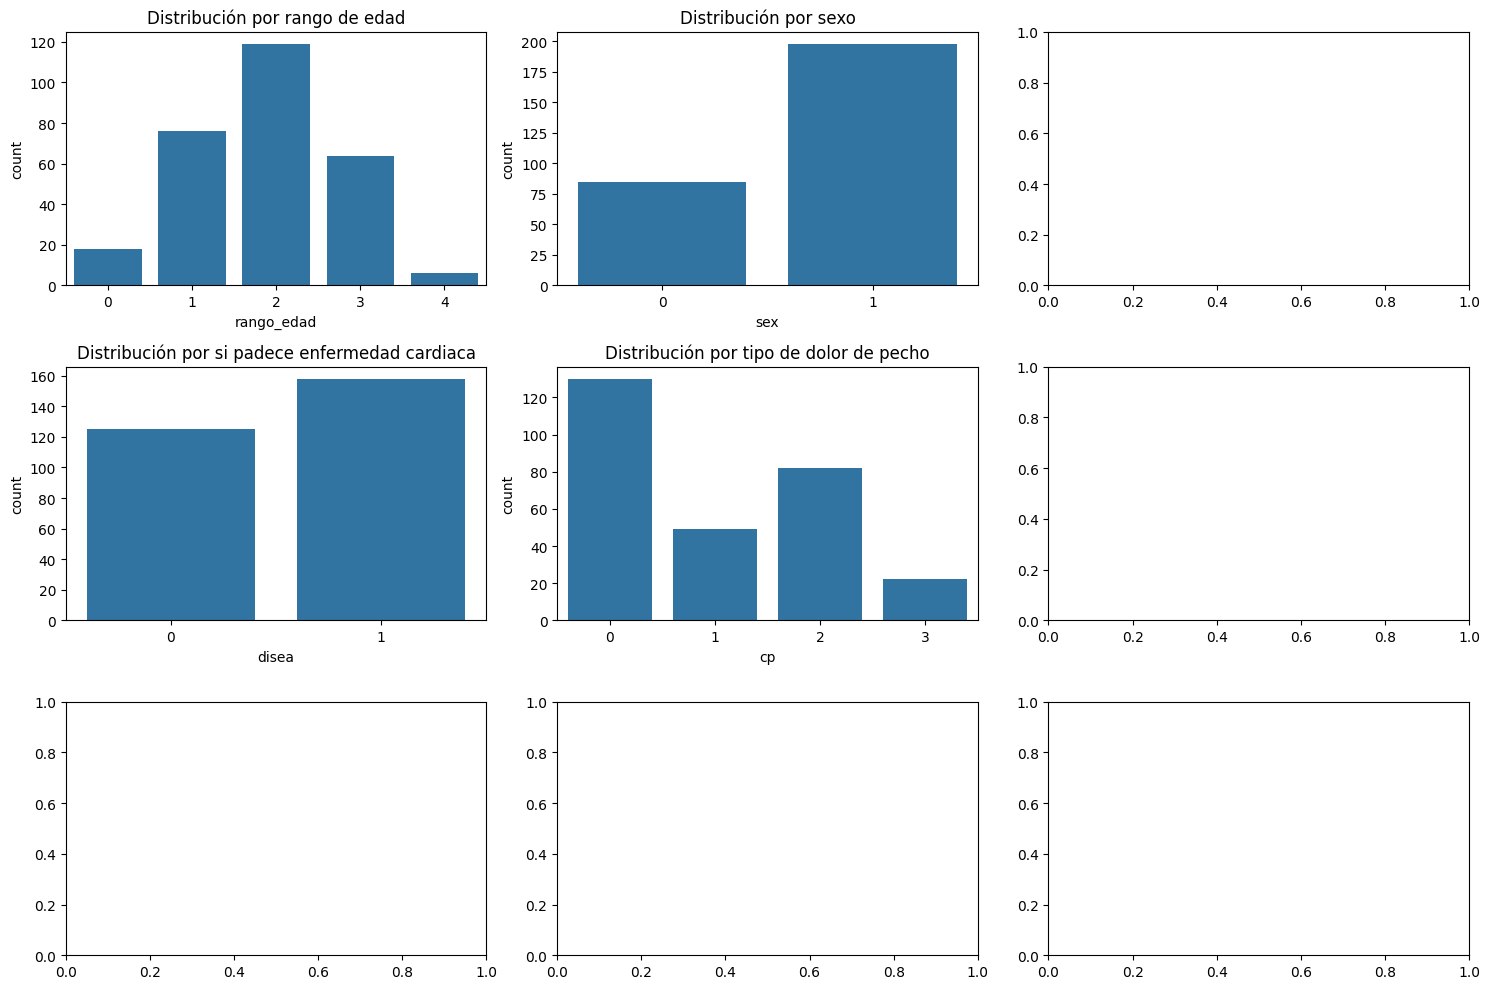

In [63]:
def graficos(dataframe):
  fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Graficamos en el primer subgráfico
  sns.countplot(x='rango_edad', data=dataframe, ax=axes[0, 0])
  axes[0, 0].set_title('Distribución por rango de edad')

# Graficamos en el segundo subgráfico
  sns.countplot(x='sex', data=dataframe, ax=axes[0, 1])
  axes[0, 1].set_title('Distribución por sexo')

# Graficamos en el tercer subgráfico
  sns.countplot(x='disea', data=dataframe, ax=axes[1, 0])
  axes[1, 0].set_title('Distribución por si padece enfermedad cardiaca')

# Graficamos en el cuarto subgráfico
  sns.countplot(x = 'cp', data = dataframe, ax = axes[1,1])
  axes[1,1].set_title('Distribución por tipo de dolor de pecho')

# Ajustamos el diseño para evitar superposiciones
  plt.tight_layout()

# Mostramos los gráficos
  plt.show()


graficos(df_copy)

In [64]:
"""
Mis variables objetivos son es "Enfermedad cardiaca" -> columna "disea" y "Colesterol sérico en mg/dl" -> columna "chol"
"""

'\nMis variables objetivos son es "Enfermedad cardiaca" -> columna "disea" y "Colesterol sérico en mg/dl" -> columna "chol"\n'

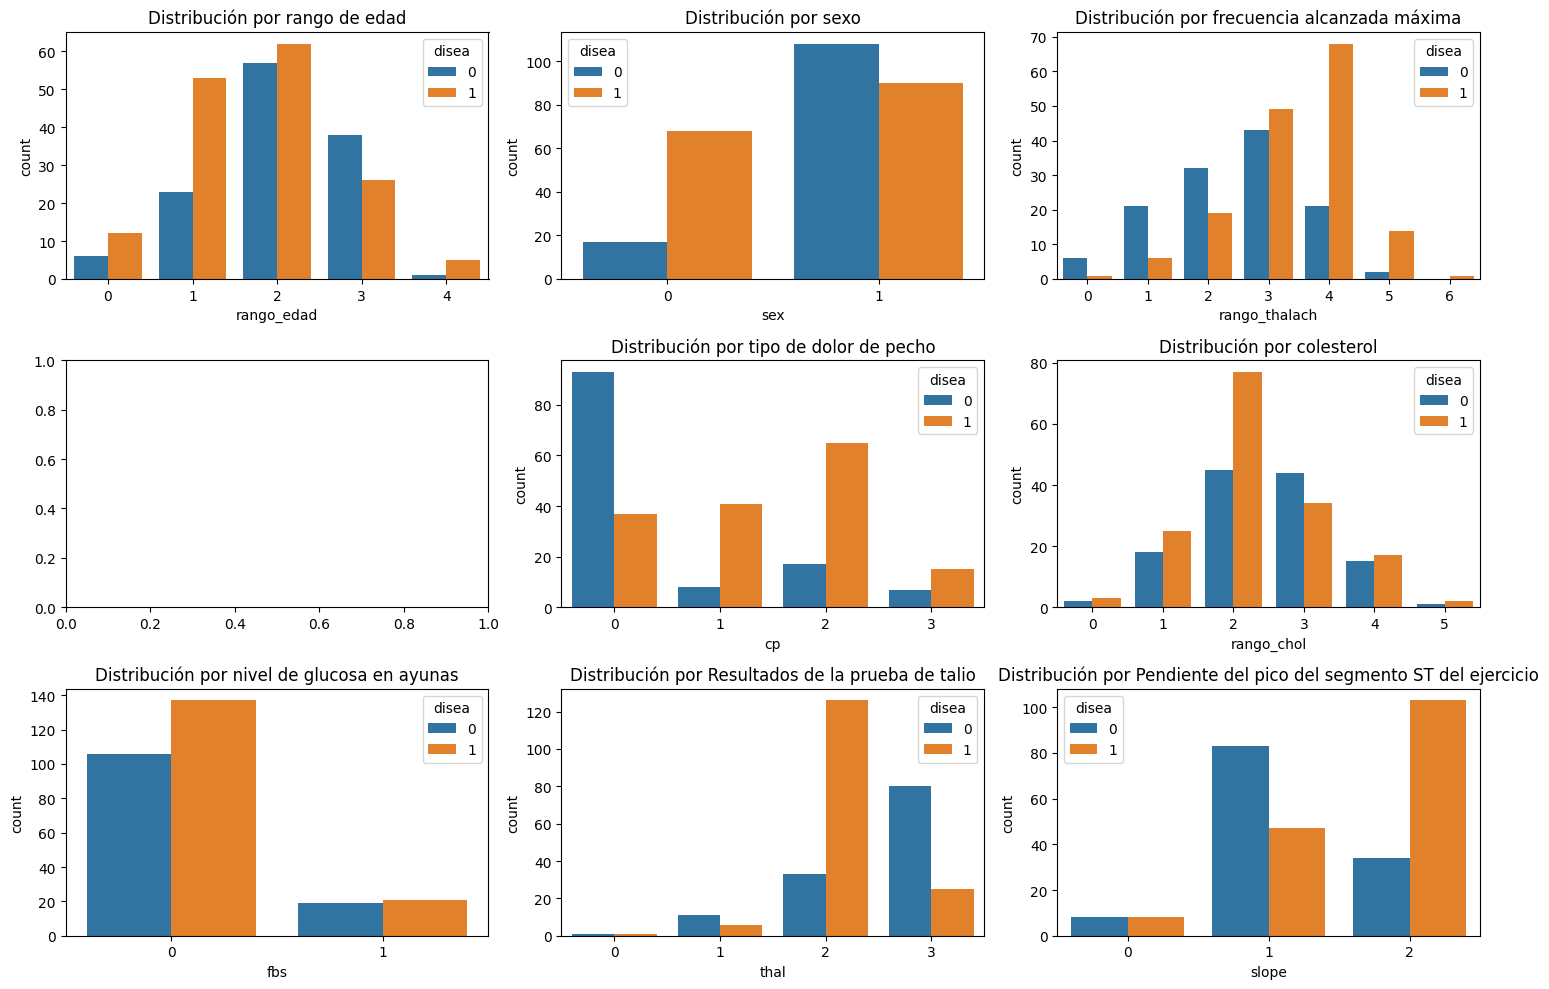

In [75]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

sns.countplot(x='rango_edad', data=df_copy, ax=axes[0, 0], hue="disea")
axes[0, 0].set_title('Distribución por rango de edad')

sns.countplot(x='sex', data=df_copy, ax=axes[0, 1],hue="disea")
axes[0, 1].set_title('Distribución por sexo')



sns.countplot(x = 'cp', data = df_copy, ax = axes[1,1],hue="disea")
axes[1,1].set_title('Distribución por tipo de dolor de pecho')

sns.countplot(x = 'rango_chol', data = df_copy, ax = axes[1,2],hue="disea")
axes[1,2].set_title('Distribución por colesterol')

sns.countplot(x = 'rango_thalach', data = df_copy, ax = axes[0,2],hue="disea")
axes[0,2].set_title('Distribución por frecuencia alcanzada máxima')

sns.countplot(x = 'fbs', data = df_copy, ax = axes[2,0],hue="disea")
axes[2,0].set_title('Distribución por nivel de glucosa en ayunas')
sns.countplot(x = 'thal', data = df_copy, ax = axes[2,1],hue="disea")
axes[2,1].set_title('Distribución por Resultados de la prueba de talio')
sns.countplot(x = 'slope', data = df_copy, ax = axes[2,2],hue="disea")
axes[2,2].set_title('Distribución por Pendiente del pico del segmento ST del ejercicio')

# Ajustamos el diseño para evitar superposiciones
plt.tight_layout()

# Mostramos los gráficos
plt.show()

In [66]:
"""
Diccionario:
Disea={
  0: "No presenta enfermedad cardiaca",
  1:"Presenta enfermedad cardiaca"
}
Sex={
  0: "Masculino,
  1:"Femenino
}
Tipo de dolor de pecho={
  0:"Bajo",
  1: "Medio",
  2:"Alto",
  3:"Muy alto"}

"""

'\nDiccionario:\nDisea={\n  0: "No presenta enfermedad cardiaca",\n  1:"Presenta enfermedad cardiaca"\n}\nSex={\n  0: "Masculino,\n  1:"Femenino\n}\nTipo de dolor de pecho={\n  0:"Bajo",\n  1: "Medio",\n  2:"Alto",\n  3:"Muy alto"}\n\n'

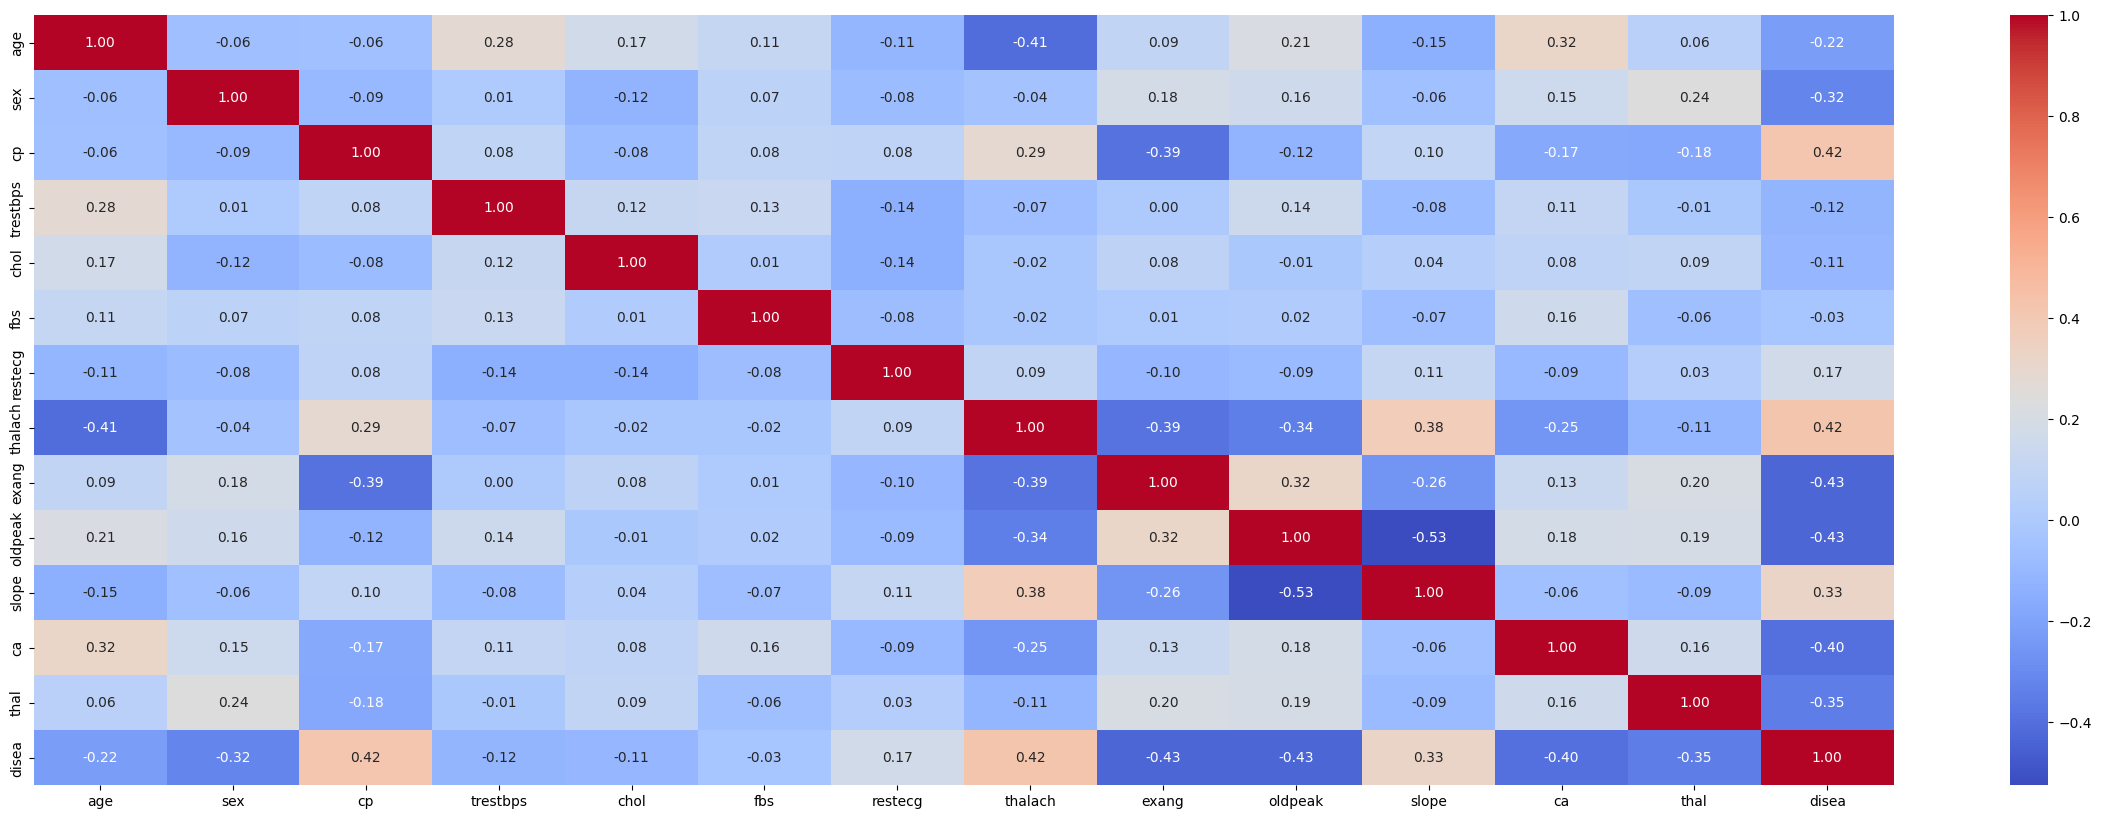

In [67]:
"""
Matriz de correlación con el dataframe dfheart_new
"""
plt.figure(figsize=(30, 10))
heatmap = sns.heatmap(dfheart_new.corr(), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.tick_params(axis='both', which='major', labelsize=10)

In [68]:
"""
Mi variable objetivo 1 es disea quien tiene una mejor relación con cp "Tipo de dolor en el pecho", slope "Pendiente del pico del segmento ST del ejercicio" y rango_thalach "Frecuencia cardíaca máxima alcanzada"

Mi segunda variable objetivo tiene una amyor relación con "age"

"""

'\nMi variable objetivo 1 es disea quien tiene una mejor relación con cp "Tipo de dolor en el pecho", slope "Pendiente del pico del segmento ST del ejercicio" y rango_thalach "Frecuencia cardíaca máxima alcanzada"\n\nMi segunda variable objetivo tiene una amyor relación con "age"\n\n'

# **Modelos Predictivos**

# Aquí busco hacer una comparación de diferentes modelos para observar cuál me convendría mejor escoger de acuerdo a su accuracy

In [69]:
def crea_modelos():
    global resultados
    y = dfheart_new['disea']
    x = dfheart_new.drop(columns='disea')
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state = 77)

    ##entrenamiento de modelos
    #1.regresión lineal
    model1 = LogisticRegression()
    model1.fit(train_x, train_y)
    predictions1 = model1.predict(test_x)
    #métricas regresion lineal
    accuracy1 = accuracy_score(test_y, predictions1)
    precision1 = precision_score(test_y, predictions1)
    recall1 = recall_score(test_y, predictions1)
    f1_score1 = f1_score(test_y, predictions1)
    auc_roc1 = roc_auc_score(test_y, predictions1)


    #2.arboles de decisión
    model2 = DecisionTreeClassifier()
    model2.fit(train_x, train_y)
    predictions2 = model2.predict(test_x)
    #métricas arboles de decisión
    accuracy2 = accuracy_score(test_y, predictions2)
    precision2 = precision_score(test_y, predictions2)
    recall2 = recall_score(test_y, predictions2)
    f1_score2 = f1_score(test_y, predictions2)
    auc_roc2 = roc_auc_score(test_y, predictions2)


    #3.Random Forest
    model3 = RandomForestClassifier()
    model3.fit(train_x, train_y)
    predictions3 = model3.predict(test_x)
    #métricas RandonForest
    accuracy3 = accuracy_score(test_y, predictions3)
    precision3 = precision_score(test_y, predictions3)
    recall3 = recall_score(test_y, predictions3)
    f1_score3 = f1_score(test_y, predictions3)
    auc_roc3 = roc_auc_score(test_y, predictions3)


    #4.Naive Bayes
    model4 = GaussianNB()
    model4.fit(train_x, train_y)
    predictions4 = model4.predict(test_x)
    #métricas Naive Bayes
    accuracy4 = accuracy_score(test_y, predictions4)
    precision4 = precision_score(test_y, predictions4)
    recall4 = recall_score(test_y, predictions4)
    f1_score4 = f1_score(test_y, predictions4)
    auc_roc4 = roc_auc_score(test_y, predictions4)


    nombre_modelo = []
    nombre_modelo.append("regresión lineal")
    nombre_modelo.append("arbol de decisión")
    nombre_modelo.append("Random Forest")
    nombre_modelo.append("Naive Bayes")

    accuracy = []
    accuracy.append(accuracy1)
    accuracy.append(accuracy2)
    accuracy.append(accuracy3)
    accuracy.append(accuracy4)

    precisionp = []
    precisionp.append(precision1)
    precisionp.append(precision2)
    precisionp.append(precision3)
    precisionp.append(precision4)

    recallp = []
    recallp.append(recall1)
    recallp.append(recall2)
    recallp.append(recall3)
    recallp.append(recall4)

    f1_scorep = []
    f1_scorep.append(f1_score1)
    f1_scorep.append(f1_score2)
    f1_scorep.append(f1_score3)
    f1_scorep.append(f1_score4)

    auc_rocp = []
    auc_rocp.append(auc_roc1)
    auc_rocp.append(auc_roc2)
    auc_rocp.append(auc_roc3)
    auc_rocp.append(auc_roc4)


    resultados = {
    'Nombre_Modelo': nombre_modelo,
    'Accuracy': accuracy,
    'Precision': precisionp,
    'Recall': recallp,
    'F1_Score': f1_scorep,
    'AUC_ROC': auc_rocp
}


    print("Regresion lineal")
    print("accuracy ",accuracy1)
    print("precision ",precision1)
    print("recall ",recall1)
    print("f1_score ",f1_score1)
    print("auc_roc ",auc_roc1)
    print(" ")

    print("Arboles de decisión")
    print("accuracy ",accuracy2)
    print("precision ",precision2)
    print("recall ",recall2)
    print("f1_score ",f1_score2)
    print("auc_roc ",auc_roc2)
    print(" ")

    print("Random Forest")
    print("accuracy ",accuracy3)
    print("precision ",precision3)
    print("recall ",recall3)
    print("f1_score ",f1_score3)
    print("auc_roc ",auc_roc3)
    print(" ")

    print("Naive Bayes")
    print("accuracy ",accuracy4)
    print("precision ",precision4)
    print("recall ",recall4)
    print("f1_score ",f1_score4)
    print("auc_roc ",auc_roc4)

In [70]:
crea_modelos()

Regresion lineal
accuracy  0.8
precision  0.7592592592592593
recall  0.9111111111111111
f1_score  0.8282828282828282
auc_roc  0.7930555555555556
 
Arboles de decisión
accuracy  0.7294117647058823
precision  0.7291666666666666
recall  0.7777777777777778
f1_score  0.7526881720430108
auc_roc  0.7263888888888889
 
Random Forest
accuracy  0.8
precision  0.7592592592592593
recall  0.9111111111111111
f1_score  0.8282828282828282
auc_roc  0.7930555555555556
 
Naive Bayes
accuracy  0.8117647058823529
precision  0.7735849056603774
recall  0.9111111111111111
f1_score  0.8367346938775511
auc_roc  0.8055555555555554


In [71]:
"""Obervamos que Random forest y árboles de decision tienen el mayor porcentaje de acierto"""

'Obervamos que Random forest y árboles de decision tienen el mayor porcentaje de acierto'

In [72]:
def visualiza_resultados():
  global resultados
  results_df = pd.DataFrame(resultados)
  results_df.set_index('Nombre_Modelo', inplace=True)
  results_df = results_df.T
  colors = ['#0077b6', '#CDDBF3','#9370DB', '#DDA0DD']
  results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)
  plt.title('Comparación de Métricas por Modelo')
  plt.xlabel('Métricas')
  plt.ylabel('Puntuación')
  plt.legend(title='Modelos')
  plt.tight_layout()
  plt.show()

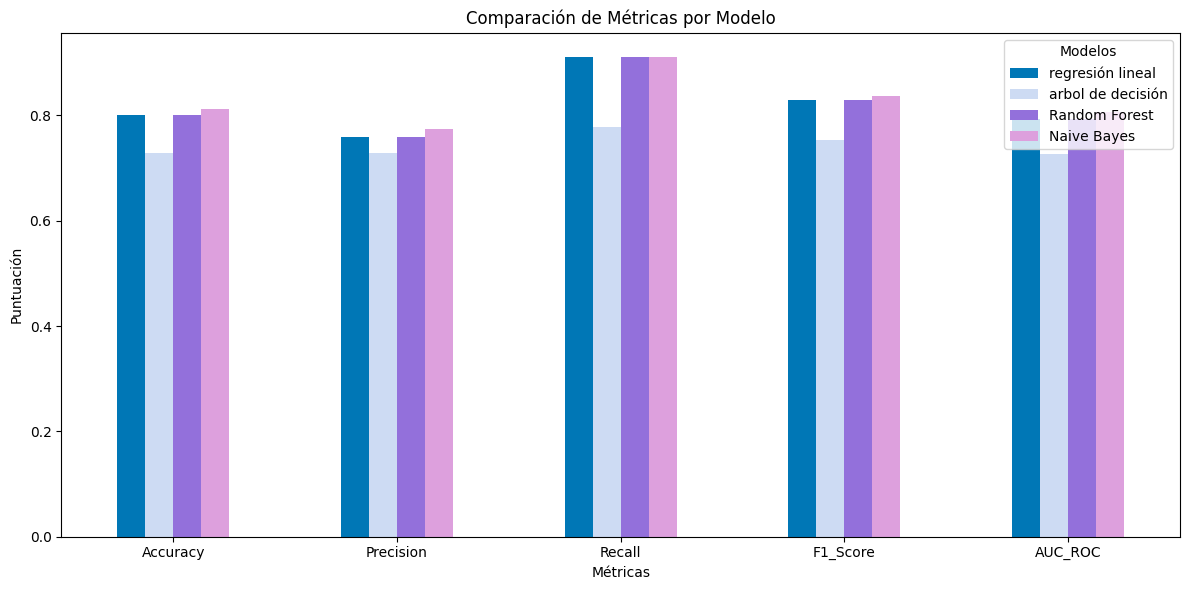

In [73]:
visualiza_resultados()

# Aquí se busca predecir si con los datos puestos de la persona se podrá tener una enfermedad cardiaca

In [74]:
y = dfheart_new['disea']
x = dfheart_new.drop(columns='disea')
modelo = RandomForestClassifier(random_state=42)
modelo.fit(x, y)

# Se creó una función para predecir la probabilidad de tener una enfermedad cardiaca
def predecir_probabilidad_enfermedad(datos):
    """
    Realiza predicciones de probabilidad de enfermedad cardíaca.

    Parámetros:
    - datos: Un diccionario con los valores para cada característica, por ejemplo:
      {'age': 40, 'sex': 1, 'cp': 2, 'trestbps': 120, 'chol': 200, ...}

    Devuelve:
    - probabilidad: La probabilidad estimada de tener una enfermedad cardíaca.
    """

    datos_usuario = pd.DataFrame([datos])

    #debido a que no se cuenta con un diccionario de datos, estoy suponiendo que 1 significa tener una enfermedad cardiaca y 0 la ausencia de esta
    probabilidad = modelo.predict_proba(datos_usuario)[:, 1]

    return probabilidad[0]

# ejemplo
valores_usuario = {'age': 45, 'sex': 0, 'cp': 1, 'trestbps': 130, 'chol': 220, 'fbs': 1, 'restecg': 0,
                   'thalach': 150, 'exang': 0, 'oldpeak': 1.5, 'slope': 1, 'ca': 0, 'thal': 2}

probabilidad_predicha = predecir_probabilidad_enfermedad(valores_usuario)
print(f'Probabilidad estimada de tener una enfermedad cardíaca: {probabilidad_predicha}')

Probabilidad estimada de tener una enfermedad cardíaca: 0.94


# **Conclusiones**

1. Una persona es más propensa a padecer de una enfermedad cardiaca dependiendo de su dolor de pecho. Es decir, a más fuerte/doloroso, es un síntoma de alerta
2. Una persona es más propensa a padecer de una enfermedad cardiaca dependiendo de su frecuencia cardiaca máxima alcanzada.
3. Según el anaálisis, que una persona padezca de alguna enfermedad cardiaca no depende necesariamente de las variables: Depresión del segmento ST inducida por el ejercicio en relación con el reposo y Pendiente del pico del segmento ST del ejercicio
4. Si tu tipo de dolor de pecho está entre 1 y 2, tienes más posibilidades de padecer una enfermedad cardiaca
5. Si tu edad está entre 40 y 60 años es posible que puedas padecer alguna enfermedad cardiaca.
6. A comparación de las mujeres, según los gráficos, los hombres tienen más posibilidad de padecer alguna enfermedad cardiaca